In [1]:
import os
import sys
import importlib
path=os.getcwd()
if (path not in sys.path):
    sys.path.append(path)
import imagesTree
import imageCrawler
import re


In [2]:
importlib.reload(imagesTree)
importlib.reload(imageCrawler)
excludeList=["http://intranet.dhbw-mannheim.de"]
myTree=imagesTree.ImagesTree("https://dhbw-mannheim.de",excludeList)

In [4]:
for i in range(1000):
    myTree.expand()

crawl https://dhbw-mannheim.de/studium/im-studium/studienorganisation
found images/links 3 221 remaining nodes 3265
already expanded https://dhbw-mannheim.de/studium/im-studium/studienorganisation
crawl https://dhbw-mannheim.de/studium/im-studium/beratung-unterstuetzung/
found images/links 3 230 remaining nodes 3491
crawl https://dhbw-mannheim.de/studium/im-studium/zusatzqualifikationen/
found images/links 3 219 remaining nodes 3707
crawl https://dhbw-mannheim.de/studium/im-studium/aktivitaeten-projekte
found images/links 3 219 remaining nodes 3923
crawl https://dhbw-mannheim.de/studium/nach-dem-studium/alumni/angebote-fuer-alumni
found images/links 3 227 remaining nodes 4147
already expanded https://dhbw-mannheim.de/studium/nach-dem-studium/alumni/angebote-fuer-alumni
crawl https://dhbw-mannheim.de/studium/nach-dem-studium/freundeskreis-der-dhbw-mannheim-ev/startseite
found images/links 3 218 remaining nodes 4361
crawl https://dhbw-mannheim.de/studium/nach-dem-studium/night-of-the-gra

## Define Tree Traversal

In [5]:
# Recursive Implemetation O(n)
# all_images = set()
# def pre_order_rec(node) -> None:
#     all_images.union(node.getImages())
#     if node.hasChildren():
#         for child in node.childs():
#             pre_order_rec(node)
#     return None
# all_images = pre_order_rec(myTree.getRoot())
# all_images

['/typo3conf/ext/dhbw_clients/Resources/Public/Mannheim/Images/logo-mannheim.svg',
 '/typo3conf/ext/dhbw_core/Resources/Public/Images/DHBW_50_Jahre_logo.svg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-duales-Studium-Slogan-Studierende-graue-Wand-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-StudyUp-Studentin-Laptop-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Vielfalt-Haende-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Bachelor-Infos-Maedchen-Sofa-Laptop-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Duale-Partner-Frau-Businessportrait-DHBW-Mannheim.jpg',
 '/fileadmin/_processed_/8/9/csm_20240529-News-Bild-Projektabschluss-Edufit-DHBW-MA_d356e3c696.jpg',
 '/fileadmin/_processed_/0/5/csm_20240517-News-Bild-Verleihung-Nachhaltigkeitspreis-Gewinner-DHBW-Ma_3894ab452c.jpg',
 '/fileadmin/_processed_/0/e/csm_20240517-News-Bild-Teaser-Diversity-Tag-DHBW_3
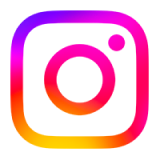
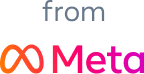

In [6]:
# Iterative Pre-Order - time: O(n), space: O(n)
def pre_order_iter(node) -> list:
    all_images = []
    stack = [node]
    while stack:
        node = stack.pop()
        stack.extend(node.childs())
        all_images.extend(node.getImages())
    return all_images    
all_images = pre_order_iter(myTree.getRoot())
all_images

In [38]:
# Iterative Level-Order O(n)
from collections import deque
def level_order_iter(node) -> list:
    all_images = []
    queue = deque([node])
    while queue:
        node = queue.popleft()
        queue.extend(node.childs())
        all_images.extend(node.getImages())
    return all_images
all_images = level_order_iter(myTree.getRoot())
all_images

['/typo3conf/ext/dhbw_clients/Resources/Public/Mannheim/Images/logo-mannheim.svg',
 '/typo3conf/ext/dhbw_core/Resources/Public/Images/DHBW_50_Jahre_logo.svg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-duales-Studium-Slogan-Studierende-graue-Wand-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-StudyUp-Studentin-Laptop-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Vielfalt-Haende-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Bachelor-Infos-Maedchen-Sofa-Laptop-DHBW-Mannheim.jpg',
 '/fileadmin/user_upload/Bilder/Slider-Startseite/Slider-Duale-Partner-Frau-Businessportrait-DHBW-Mannheim.jpg',
 '/fileadmin/_processed_/8/9/csm_20240529-News-Bild-Projektabschluss-Edufit-DHBW-MA_d356e3c696.jpg',
 '/fileadmin/_processed_/0/5/csm_20240517-News-Bild-Verleihung-Nachhaltigkeitspreis-Gewinner-DHBW-Ma_3894ab452c.jpg',
 '/fileadmin/_processed_/0/e/csm_20240517-News-Bild-Teaser-Diversity-Tag-DHBW_3

## Hash Images

In [7]:
def get_tokens(img_url):
    clean_url = re.split(r'[^a-zA-Z]+', img_url)
    clean_url = [token.lower() for token in clean_url if len(token)>2]
    return clean_url

In [8]:
# Get image tokens
all_img_tokens = list()
for img_url in all_images:
    all_img_tokens.append((get_tokens(img_url), img_url))

In [9]:
def create_hash_table(all_img_tokens):
    hash_table = dict()
    for keys, img_url in all_img_tokens:
        for key in keys:
            if key in hash_table:
                hash_table[key].add(img_url)
            else:
                hash_table[key] = {img_url}
    return hash_table
hash_table = create_hash_table(all_img_tokens)
print(hash_table.keys())

dict_keys(['typo', 'conf', 'ext', 'dhbw', 'clients', 'resources', 'public', 'mannheim', 'images', 'logo', 'svg', 'core', 'jahre', 'fileadmin', 'user', 'upload', 'bilder', 'slider', 'startseite', 'duales', 'studium', 'slogan', 'studierende', 'graue', 'wand', 'jpg', 'studyup', 'studentin', 'laptop', 'vielfalt', 'haende', 'bachelor', 'infos', 'maedchen', 'sofa', 'duale', 'partner', 'frau', 'businessportrait', 'processed', 'csm', 'news', 'bild', 'projektabschluss', 'edufit', 'verleihung', 'nachhaltigkeitspreis', 'gewinner', 'teaser', 'diversity', 'tag', 'cbbeadcd', 'data', 'image', 'png', 'base', 'ivborw', 'kggoaaaansuheugaaakaaaacgcayaaaclz', 'ctaaatxkleqvr', 'aezbaq', 'aaajaonu', 'tdl', 'qaaaaaaaag', 'nry', 'gdrx', 'ndcfyzz', 'wqqohyb', 'rydt', 'ahqi', 'jdprafizo', 'uhosnfmi', 'uvftlzm', 'tdrznk', 'ctef', 'jqudm', 'mbgtxbofguxayhjalvq', 'guee', 'tgz', 'tndaa', 'hwhadcpciaa', 'dbmbbq', 'bonqfji', 'ggm', 'frgwrnxkwxmrhs', 'kwsyyydobucdlk', 'sycnod', 'cixohzw', 'nnljfk', 'ffs', 'frzpegmt', 

In [11]:
len(all_images)

2513

In [12]:
len(hash_table.keys())

3097